In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(6)

In [3]:
plt.style.use('ggplot')

In [4]:
df = pd.read_csv('./data/house-votes-84.csv')

In [5]:
df.columns = ['party', 'infants', 'water', 'budget', 'physician', 'salvador',
       'religious', 'satellite', 'aid', 'missile', 'immigration', 'synfuels',
       'education', 'superfund', 'crime', 'duty_free_exports', 'eaa_rsa']

In [6]:
df.replace(('y', 'n', '?'), (1, 0,0), inplace=True)

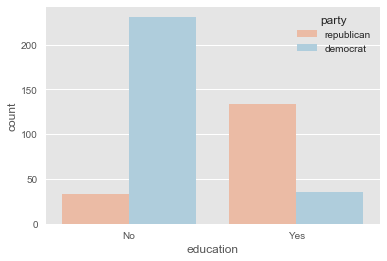

In [7]:
plt.figure()
sns.countplot(x='education', hue='party', data=df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

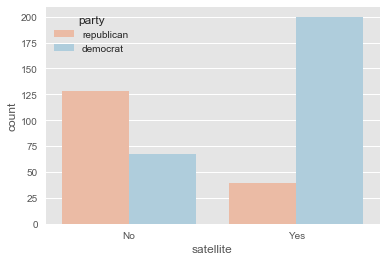

In [8]:
plt.figure()
sns.countplot(x='satellite', hue='party', data=df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

In [9]:
# Create arrays for the features and the response variable
y = df['party'].values
X = df.drop('party', axis=1).values

# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(6)

# Fit the classifier to the data
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [12]:
# Predict the labels for the training data X
y_pred = knn.predict(X)

pred = (y_pred == y)
print((sum(pred))/473*100)

86.8921775899


In [16]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [18]:
print(confusion_matrix(y, y_pred))

[[254  13]
 [ 10 157]]


In [19]:
print(classification_report(y, y_pred))

             precision    recall  f1-score   support

   democrat       0.96      0.95      0.96       267
 republican       0.92      0.94      0.93       167

avg / total       0.95      0.95      0.95       434



In [22]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X, y)
y_pred = logreg.predict(X)

In [23]:
logreg.score(X,y)

0.97004608294930872

In [ ]:
from sklearn.metrics import roc_curve
y_pred_prob = logreg.predict_proba(X)[:,1]
fpr, tpr, thresholds = roc_curve(y, y_pred_prob)